<a href="https://colab.research.google.com/github/thomasplato/TheAIEngineer_Week1/blob/main/CapstoneWeek1_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone: Gradient-Based Optimization Case Study. Week 1
Just run all cells


# Capstone: Gradient-Based Optimization Case Study (Week 1)

This notebook explores several variants of **gradient-based optimization algorithms**, including:
- Standard Gradient Descent (GD).
- Heavy-Ball Momentum method
- Stochastic Gradient Descent (SGD)
- Gradient Descent with Decaying Learning Rate

The goal is to illustrate how different parameter choices (learning rate `η`, momentum `β`, and noise `σ`) affect convergence behavior and stability when approaching a minimum.

## Contents

1. **Gradient Descent and Heavy-Ball Augmentation**  
   Comparison of basic gradient descent with heavy-ball momentum. Visual analysis of convergence speed and oscillation effects.

2. **Stochastic Gradient Descent (SGD)**  
   Demonstrates the effect of noise (`σ`) on convergence and stability for a fixed learning rate.

3. **Gradient Descent with Decaying Learning Rate**  
   Shows how dynamically reducing the learning rate over iterations improves stability.

4. **Visualization and Convergence Analysis**  
   Plots illustrating the optimization paths and convergence of `f(x_k)` toward `f(x*)`.

After each plot and metrics calculation I comment in the Jupyter Notebook.

## Data

No external dataset is used. I use the function `f(x)` defined in the note 'Gradient-Based Optimization Case Study'. The function is a piecewise function with a kink at `x=3`. The function is defined as: f(x) = |½x³ - ½x²| + ½x



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

def f(x):
  return abs(0.5*x**3 -1.5*x**2) + 0.5*x

def f_prime(x):
    if x < 3:
        return -1.5 * x**2 + 3 * x + 0.5
    else:
        return 1.5 * x**2 - 3 * x + 0.5

def gradient_descent(x0, eta, iterations):
    x = x0
    trajectory = [x]
    trajectory_f = [f(x)]
    for _ in range(iterations):
        x = x - eta * f_prime(x)
        trajectory.append(x)
        trajectory_f.append(f(x))
    return trajectory, trajectory_f


def heavy_ball(x0, eta, beta, iterations):
    x = x0
    v = 0
    trajectory = [x]
    trajectory_f = [f(x)]
    for _ in range(iterations):
        v = beta * v + f_prime(x) # the velocity component
        x = x - eta * v
        trajectory.append(x)
        trajectory_f.append(f(x))
    return trajectory, trajectory_f


def stochastic_gradient_descent(x0, eta, iterations, sigma):
    # fixed eta
    x = x0
    trajectory = [x]
    trajectory_f = [f(x)]
    for _ in range(iterations):
        noise = np.random.normal(0, sigma)
        x = x - eta * (f_prime(x) + noise)
        trajectory.append(x)
        trajectory_f.append(f(x))
    return trajectory, trajectory_f

def stochastic_gradient_descent_dimin(x0, eta_0, gamma, iterations, sigma):
    # diminishing eta steps
    x = x0
    trajectory = [x]
    trajectory_f = [f(x)]
    for _ in range(iterations):
        noise = np.random.normal(0, sigma)
        eta_k = eta_0 / (1 + gamma * _)
        x = x - eta_k * (f_prime(x) + noise)
        trajectory.append(x)
        trajectory_f.append(f(x))
    return trajectory, trajectory_f

def gradient_descent_metrics(path_x , path_f, tolerance = 0.10):
  traj_x, traj_f = path_x, path_f
  final_gap = abs(f(traj_x[-1]) - f(minimum)) # comparing f(x_k) to f(x*)
  best_so_far_gap = min(abs(np.array(traj_f) - f(minimum))) # comparing f(x_k) to f(x*)
  iterations_to_tolerance = -1
  for i, f_val in enumerate(traj_f):
      if abs(f_val - f(minimum)) < tolerance:
          iterations_to_tolerance = i
          break

  print(f'Final gap (x_k vs x*): {final_gap}')
  print(f'Best so far gap (f(x_k) - f(x*)): {best_so_far_gap}')
  print(f'Iterations to reach tolerance (f(x_k) - f(x*) < {tolerance}): {iterations_to_tolerance}')




### Gradient descent, Heavy-ball augmented version and stochastic gradient descent

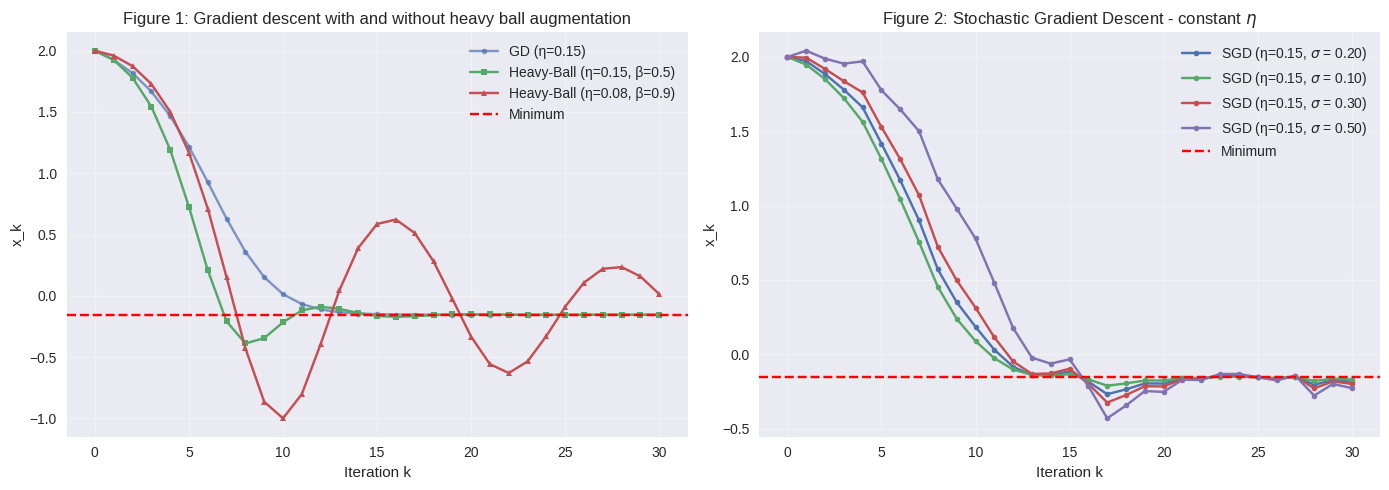

In [ ]:
# Parameters:
x0 = 2.0
eta = 0.15
iterations = 30
sigma = 0.20

minimum = 1 - 2/3 * np.sqrt(3)

# Compare different beta values
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# left plot: Better beta values
gd_path , gd_path_f = gradient_descent(x0, eta, iterations)
hb1, hb1_f = heavy_ball(x0, eta, 0.5, iterations)
hb2, hb2_f = heavy_ball(x0, 0.08, 0.9, iterations) # Not stable

axes[0].plot(gd_path, label='GD (η=0.15)', marker='o', markersize=4, alpha=0.7)
axes[0].plot(hb1, label='Heavy-Ball (η=0.15, β=0.5)', marker='s', markersize=4)
axes[0].plot(hb2, label='Heavy-Ball (η=0.08, β=0.9)', marker='^', markersize=4)
axes[0].axhline(y=minimum, color='r', linestyle='--', label='Minimum')
axes[0].set_xlabel('Iteration k')
axes[0].set_ylabel('x_k')
axes[0].set_title('Figure 1: Gradient descent with and without heavy ball augmentation')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Right plot: Stochachic Gradient Descent
np.random.seed(50) # Set seed for reproducibility
sgd_path1, sgd_path1_f  = stochastic_gradient_descent(x0, eta, iterations, sigma)
np.random.seed(50) # Set seed for reproducibility
sgd_path2, sgd_path2_f = stochastic_gradient_descent(x0, eta, iterations, 0.10)
np.random.seed(50) # Set seed for reproducibility
sgd_path3, sgd_path3_f = stochastic_gradient_descent(x0, eta, iterations, 0.30)
np.random.seed(50) # Set seed for reproducibility
sgd_path4, sgd_path4_f = stochastic_gradient_descent(x0, eta, iterations, 0.50)


axes[1].plot(sgd_path1, label= r'SGD (η=0.15, $\sigma$ = 0.20)', marker='o', markersize=4)
axes[1].plot(sgd_path2, label= r'SGD (η=0.15, $\sigma$ = 0.10)', marker='o', markersize=4)
axes[1].plot(sgd_path3, label= r'SGD (η=0.15, $\sigma$ = 0.30)', marker='o', markersize=4)
axes[1].plot(sgd_path4, label= r'SGD (η=0.15, $\sigma$ = 0.50)', marker='o', markersize=4)
axes[1].axhline(y=minimum, color='r', linestyle='--', label='Minimum')
axes[1].set_xlabel('Iteration k')
axes[1].set_ylabel('x_k')
axes[1].set_title(r'Figure 2: Stochastic Gradient Descent - constant $\eta$')
axes[1].legend()
axes[1].grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

Figure 1: Gradient Descent + heavy-ball augmentation
In the left plot: we see that the heavy ball method means oscillations for too high beta values (the velocity component is too high). Compared to vanilla gradient descent, heavy ball with beta = 0.5 moves quicker to minimum - but at the cost of a little overshooting.

Figure 2: In the right plot: stochastic gradient descent with constant eta = 0.15 and different values of sigma, is not faster than GD. As expected: with a very high sigma the x_k does not stabilize.

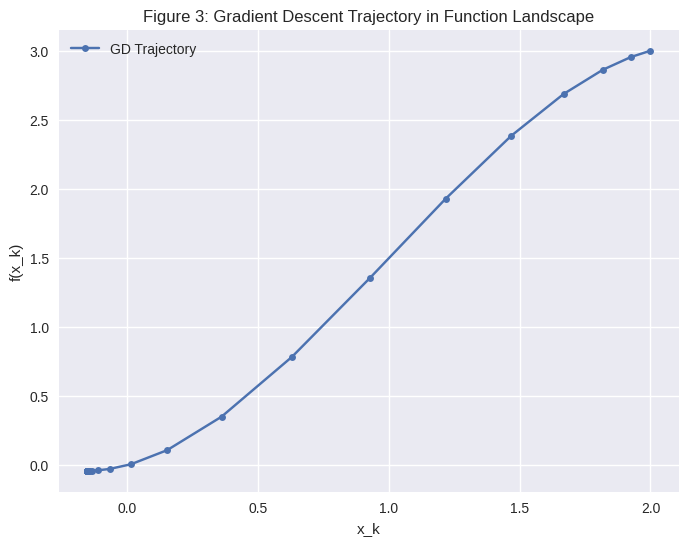

In [ ]:
# Plot the trajectory in the function landscape
plt.figure(figsize=(8, 6))
plt.plot(gd_path, gd_path_f, marker='o', markersize=5, linestyle='-', label='GD Trajectory')
plt.xlabel('x_k')
plt.ylabel('f(x_k)')
plt.title('Figure 3: Gradient Descent Trajectory in Function Landscape')
plt.legend()
plt.grid(True)
plt.show()

Figure 3: How we approch f(x*)

### Gradient descent with decaying eta

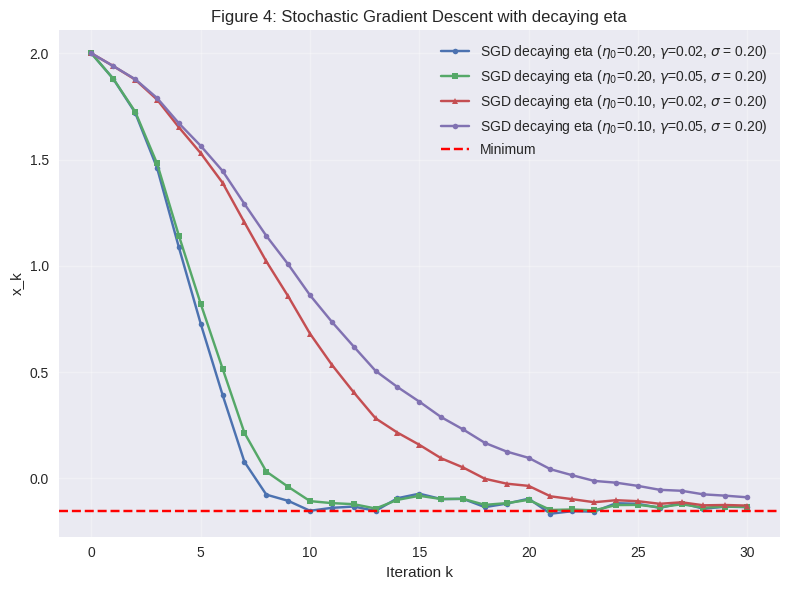

In [ ]:
# Compare different beta values
fig1, axes1 = plt.subplots(1, 1, figsize=(8, 6))

# Plot: Four Stochastic Gradient Descent with decaying eta
# eta_0 = 0.2, gamma = 0.02, sigma = 0.2
np.random.seed(42) # Set seed for reproducibility
sgd_demin1, sgd_demin1_f = stochastic_gradient_descent_dimin(x0, 0.2, 0.02, iterations, sigma)

# eta_0 = 0.2, gamma = 0.05, sigma = 0.2
np.random.seed(42) # Set seed for reproducibility
sgd_demin2, sgd_demin2_f = stochastic_gradient_descent_dimin(x0, 0.2, 0.05, iterations, sigma)

# eta_0 = 0.1, gamma = 0.02, sigma = 0.2
np.random.seed(42) # Set seed for reproducibility
sgd_demin3, sgd_demin3_f = stochastic_gradient_descent_dimin(x0, 0.1, 0.02, iterations, sigma)

# eta_0 = 0.1, gamma = 0.05, sigma = 0.2
np.random.seed(42) # Set seed for reproducibility
sgd_demin4, sgd_demin4_f = stochastic_gradient_descent_dimin(x0, 0.1, 0.05, iterations, sigma)

axes1.plot(sgd_demin1, label= r'SGD decaying eta ($\eta_0$=0.20, $\gamma$=0.02, $\sigma$ = 0.20)', marker='o', markersize=4)
axes1.plot(sgd_demin2, label= r'SGD decaying eta ($\eta_0$=0.20, $\gamma$=0.05, $\sigma$ = 0.20)', marker='s', markersize=4)
axes1.plot(sgd_demin3, label= r'SGD decaying eta ($\eta_0$=0.10, $\gamma$=0.02, $\sigma$ = 0.20)', marker='^', markersize=4)
axes1.plot(sgd_demin4, label= r'SGD decaying eta ($\eta_0$=0.10, $\gamma$=0.05, $\sigma$ = 0.20)', marker='o', markersize=4)
axes1.axhline(y=minimum, color='r', linestyle='--', label='Minimum')
axes1.set_xlabel('Iteration k')
axes1.set_ylabel('x_k')
axes1.set_title('Figure 4: Stochastic Gradient Descent with decaying eta')
axes1.legend()
axes1.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Figure 4: In this case a higher value of eta_0 ensures faster approach to x*. Lower gamma seems better in this case. As low as eta_0 = 0.1 is slower than vanilla gradient descent

# Metrics

### Gradient Descent Metrics

In [ ]:
print('η=0.15')
gradient_descent_metrics(gd_path , gd_path_f)

η=0.15
Final gap (x_k vs x*): 1.2358170042858774e-14
Best so far gap (f(x_k) - f(x*)): 1.2358170042858774e-14
Iterations to reach tolerance (f(x_k) - f(x*) < 0.1): 10


### Heavy-ball augmented Gradient Descent Metrics

In [ ]:
print('η=0.15, β=0.5')
gradient_descent_metrics(hb1, hb1_f)

η=0.15, β=0.5
Final gap (x_k vs x*): 2.871264753734337e-10
Best so far gap (f(x_k) - f(x*)): 2.871264753734337e-10
Iterations to reach tolerance (f(x_k) - f(x*) < 0.1): 7


In [ ]:
print('η=0.15, β=0.9')
gradient_descent_metrics(hb2, hb2_f)

η=0.15, β=0.9
Final gap (x_k vs x*): 0.04672038475056614
Best so far gap (f(x_k) - f(x*)): 0.007411278065572721
Iterations to reach tolerance (f(x_k) - f(x*) < 0.1): 13


Comparing vanilla gradient descent with the heavy-ball augmented version shows that the heavy-ball method with η=0.15 and β=0.5 is faster to reach tolerance. But the heavy-ball method with η=0.15 and β=0.9 shows that the final gap is larger than minimum of the gaps f(x_k) - f(x*). This is consistent with the plot above where we saw oscillations. The 'ball' can be too heavy.

### Stochastic Gradient Descent constant η Metrics

In [ ]:
print('eta=0.15, sigma = 0.10')
gradient_descent_metrics(sgd_path2, sgd_path2_f)
print()

print('eta=0.15, sigma = 0.20')
gradient_descent_metrics(sgd_path1, sgd_path1_f)
print()

print('eta=0.15, sigma = 0.30')
gradient_descent_metrics(sgd_path3, sgd_path3_f)
print()

print('eta=0.15, sigma = 0.50')
gradient_descent_metrics(sgd_path4, sgd_path4_f)


eta=0.15, sigma = 0.10
Final gap (x_k vs x*): 0.00038468618858838316
Best so far gap (f(x_k) - f(x*)): 1.5568286174105772e-09
Iterations to reach tolerance (f(x_k) - f(x*) < 0.1): 10

eta=0.15, sigma = 0.20
Final gap (x_k vs x*): 0.0015275035194426898
Best so far gap (f(x_k) - f(x*)): 1.9217413035899078e-08
Iterations to reach tolerance (f(x_k) - f(x*) < 0.1): 11

eta=0.15, sigma = 0.30
Final gap (x_k vs x*): 0.0034118796521066044
Best so far gap (f(x_k) - f(x*)): 8.888189934053159e-08
Iterations to reach tolerance (f(x_k) - f(x*) < 0.1): 12

eta=0.15, sigma = 0.50
Final gap (x_k vs x*): 0.009340948932773145
Best so far gap (f(x_k) - f(x*)): 6.262382776373032e-07
Iterations to reach tolerance (f(x_k) - f(x*) < 0.1): 13


For all four stochastic descent paths with contant eta the best gap is smaller than the final gap f(x_k) - f(x*) due to the normal distributed 'noise'.  As we saw in figure 2 larger sigma means slower convergence (and very high sigma gives unstable path)

### Stochastic Gradient Descent decaying η Metrics

In [ ]:
print('SGD decaying eta (eta_0=0.20, gamma=0.02, sigma = 0.20)')
gradient_descent_metrics(sgd_demin1, sgd_demin1_f)
print()

print('SGD decaying eta (eta_0=0.20, gamma=0.05, sigma = 0.20)')
gradient_descent_metrics(sgd_demin2, sgd_demin2_f)
print()

print('SGD decaying eta (eta_0=0.10, gamma=0.02, sigma = 0.20)')
gradient_descent_metrics(sgd_demin3, sgd_demin3_f)
print()

print('SGD decaying eta (eta_0=0.10, gamma=0.05, sigma = 0.20)')
gradient_descent_metrics(sgd_demin4, sgd_demin4_f)

SGD decaying eta (eta_0=0.20, gamma=0.02, sigma = 0.20)
Final gap (x_k vs x*): 0.0006835772114554758
Best so far gap (f(x_k) - f(x*)): 8.421106810069245e-07
Iterations to reach tolerance (f(x_k) - f(x*) < 0.1): 7

SGD decaying eta (eta_0=0.20, gamma=0.05, sigma = 0.20)
Final gap (x_k vs x*): 0.0007495339051401192
Best so far gap (f(x_k) - f(x*)): 3.598488141640793e-05
Iterations to reach tolerance (f(x_k) - f(x*) < 0.1): 8

SGD decaying eta (eta_0=0.10, gamma=0.02, sigma = 0.20)
Final gap (x_k vs x*): 0.0012598228552520019
Best so far gap (f(x_k) - f(x*)): 0.0012598228552520019
Iterations to reach tolerance (f(x_k) - f(x*) < 0.1): 17

SGD decaying eta (eta_0=0.10, gamma=0.05, sigma = 0.20)
Final gap (x_k vs x*): 0.007406360241365401
Best so far gap (f(x_k) - f(x*)): 0.007406360241365401
Iterations to reach tolerance (f(x_k) - f(x*) < 0.1): 21


As we saw in figure 4, using eta = 0.20 is faster than using eta_0 = 0.10 (number of iterations to reach tolerance is lower)

# Around the function's kink at x = 3

When x_0 = 3.1, high eta

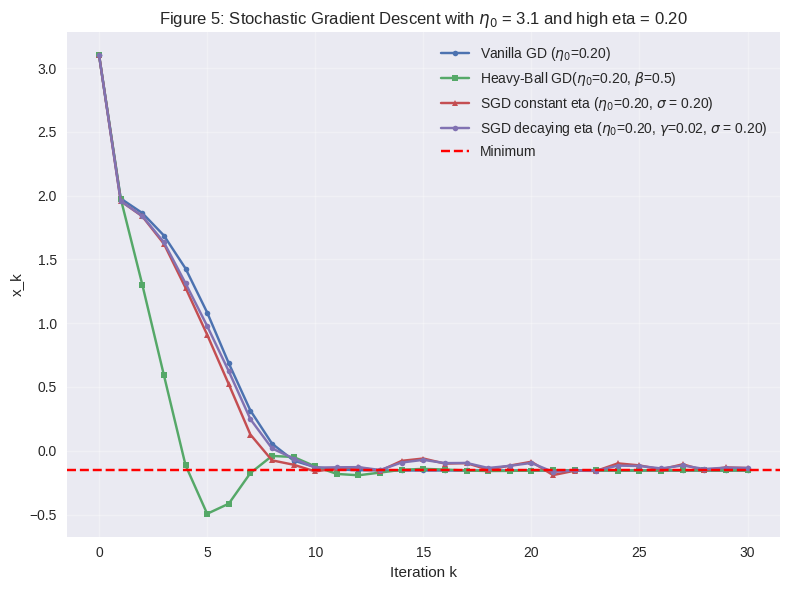

In [ ]:
fig2, axes2 = plt.subplots(1, 1, figsize=(8, 6))

x0 = 3.1

# Plot:
# Vanilla GD: eta = 0.20
gd_path2 , gd_path2_f = gradient_descent(x0, 0.20, iterations)

# Heavy-ball augmented GD: eta = 0.20, beta = 0.50
hb3, hb3_f = heavy_ball(x0, 0.20, 0.5, iterations)

# SGD with constant eta = 0.2, sigma = 0.2
np.random.seed(42) # Set seed for reproducibility
sgd_path5, sgd_path5_f  = stochastic_gradient_descent(x0, 0.2, iterations, 0.2)

# SGD with decaying eta. eta_0 = 0.2, gamma = 0.02, sigma = 0.2
np.random.seed(42) # Set seed for reproducibility
sgd_demin5, sgd_demin5_f = stochastic_gradient_descent_dimin(x0, 0.2, 0.02, iterations, 0.2)

axes2.plot(gd_path2, label = r'Vanilla GD ($\eta_0$=0.20)', marker='o', markersize=4)
axes2.plot(hb3, label = r'Heavy-Ball GD($\eta_0$=0.20, $\beta$=0.5)', marker='s', markersize=4)
axes2.plot(sgd_path5, label = r'SGD constant eta ($\eta_0$=0.20, $\sigma$ = 0.20)', marker='^', markersize=4)
axes2.plot(sgd_demin5, label = r'SGD decaying eta ($\eta_0$=0.20, $\gamma$=0.02, $\sigma$ = 0.20)', marker='o', markersize=4)
axes2.axhline(y=minimum, color='r', linestyle='--', label='Minimum')
axes2.set_xlabel('Iteration k')
axes2.set_ylabel('x_k')
axes2.set_title(r'Figure 5: Stochastic Gradient Descent with $\eta_0$ = 3.1 and high eta = 0.20')
axes2.legend()
axes2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Figure 5: In spite of the kink at x = 3 we reach minimum with high eta: we escape the trap around x = 3

When x0 = 3.1, low eta

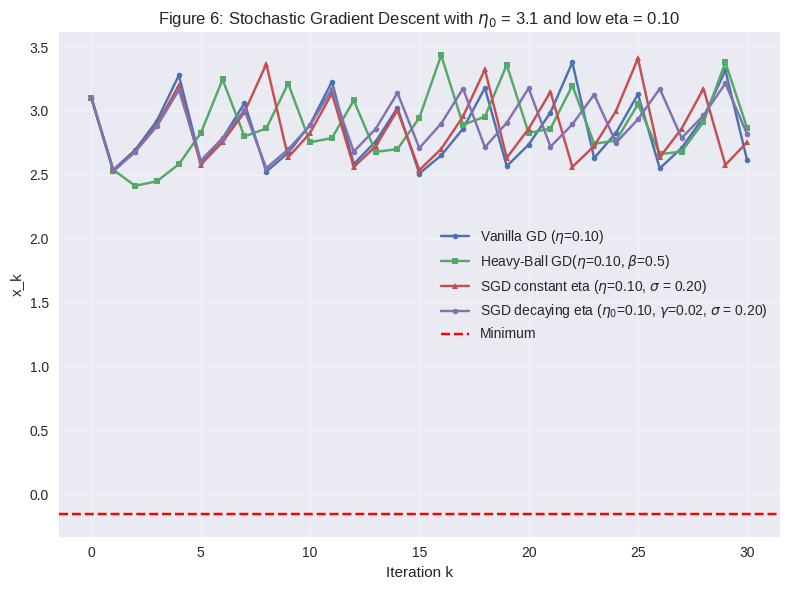

In [ ]:
fig3, axes3 = plt.subplots(1, 1, figsize=(8, 6))

x0 = 3.1

# Plot:
# Vanilla GD: eta = 0.10
gd_path3 , gd_path3_f = gradient_descent(x0, 0.10, iterations)

# Heavy-ball augmented GD: eta = 0.10, beta = 0.50
hb4, hb4_f = heavy_ball(x0, 0.10, 0.5, iterations)

# SGD with constant eta = 0.1, sigma = 0.2
np.random.seed(42) # Set seed for reproducibility
sgd_path6, sgd_path6_f  = stochastic_gradient_descent(x0, 0.10, iterations, 0.2)

# SGD with decaying eta. eta_0 = 0.10, gamma = 0.02, sigma = 0.2
np.random.seed(42) # Set seed for reproducibility
sgd_demin6, sgd_demin6_f = stochastic_gradient_descent_dimin(x0, 0.1, 0.02, iterations, 0.2)

axes3.plot(gd_path3, label = r'Vanilla GD ($\eta$=0.10)', marker='o', markersize=4)
axes3.plot(hb4, label = r'Heavy-Ball GD($\eta$=0.10, $\beta$=0.5)', marker='s', markersize=4)
axes3.plot(sgd_path6, label = r'SGD constant eta ($\eta$=0.10, $\sigma$ = 0.20)', marker='^', markersize=4)
axes3.plot(sgd_demin6, label = r'SGD decaying eta ($\eta_0$=0.10, $\gamma$=0.02, $\sigma$ = 0.20)', marker='o', markersize=4)
axes3.axhline(y=minimum, color='r', linestyle='--', label='Minimum')
axes3.set_xlabel('Iteration k')
axes3.set_ylabel('x_k')
axes3.set_title(r'Figure 6: Stochastic Gradient Descent with $\eta_0$ = 3.1 and low eta = 0.10')
axes3.legend()
axes3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Figure 6: With low eta we do not reach minimum. We are trapped oscillating around the kink